In [ ]:
import math
from PIL import Image
imageFile = '/content/org.png'
print(imageFile)
im = Image.open(imageFile)
rgbHistogram = im.histogram()
print('Entropy Value:')
for rgb in range(1):
     totalPixels = sum(rgbHistogram[rgb * 256 : (rgb + 1) * 256])
     ent = 0.0
     for col in range(rgb * 256, (rgb + 1) * 256):
         freq = float(rgbHistogram[col]) / totalPixels
         if freq > 0:
             ent = ent + freq * math.log(freq, 2)
     ent = -ent
     print(ent)

/content/org.png
Entropy Value:
5.934386268495819


In [ ]:
import math
from PIL import Image
imageFile = '/content/Encrypted_image_Brain.jpg'
print(imageFile)
im = Image.open(imageFile)
rgbHistogram = im.histogram()
print('Entropy Value:')
for rgb in range(1):
     totalPixels = sum(rgbHistogram[rgb * 256 : (rgb + 1) * 256])
     ent = 0.0
     for col in range(rgb * 256, (rgb + 1) * 256):
         freq = float(rgbHistogram[col]) / totalPixels
         if freq > 0:
             ent = ent + freq * math.log(freq, 2)
     ent = -ent
     print(ent)

/content/Encrypted_image_Brain.jpg
Entropy Value:
6.175886878559929


In [ ]:
#psnr - peak signal to noise ratio


from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("/content/org.png")
     compressed = cv2.imread("/content/Encrypted_image_Brain.jpg", 1)
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 29.116636416472 dB


In [ ]:
# correlation coeffient


try:
    import Image
except ImportError:
    Image = None

try:
    from PIL import Image
except ImportError:
    Image = None


try:
    assert Image is not None
except AssertionError:
    print("This script requires pillow. Please install with: pip install pillow")
    exit()

try:
    import numpy
except ImportError:
    print("This script requires numpy. Please install with: pip install numpy")
    exit()

import math
import sys
import timeit


def normalizeArray(a):
    """
    Normalize the given array to values between 0 and 1.
    """
    w, h = a.shape
    minval = a.min()
    if minval < 0:  # shift to positive...
        a = a + abs(minval)
    maxval = a.max()  # THEN, get max value!
    new_a = numpy.zeros(a.shape, 'd')
    for x in range(0, w):
        for y in range(0, h):
            new_a[x, y] = float(a[x, y]) / maxval
    return new_a


def correlation(input, match):
    """
    Calculate the correlation coefficients between the given pixel arrays.
    """
    t = timeit.Timer()
    assert match.shape <= input.shape, "Match Template must be Smaller than the input"
    c = numpy.zeros(input.shape)  # store the coefficients...
    mfmean = match.mean()
    iw, ih = input.shape  # get input image width and height
    mw, mh = match.shape  # get match image width and height

    print("Computing Correleation Coefficients...")
    start_time = t.timer()

    for i in range(0, iw):
        for j in range(0, ih):

            # find the left, right, top
            # and bottom of the sub-image
            if i-mw/2 <= 0:
                left = 0
            elif iw - i < mw:
                left = iw - mw
            else:
                left = i

            right = left + mw

            if j - mh/2 <= 0:
                top = 0
            elif ih - j < mh:
                top = ih - mh
            else:
                top = j

            bottom = top + mh

            # take a slice of the input image as a sub image
            sub = input[left:right, top:bottom]
            assert sub.shape == match.shape, "SubImages must be same size!"
            localmean = sub.mean()
            temp = (sub - localmean) * (match - mfmean)
            s1 = temp.sum()
            temp = (sub - localmean) * (sub - localmean)
            s2 = temp.sum()
            temp = (match - mfmean) * (match - mfmean)
            s3 = temp.sum()
            denom = s2*s3
            if denom == 0:
                temp = 0
            else:
                temp = s1 / math.sqrt(denom)

            c[i, j] = temp

    end_time = t.timer()
    print ("=> Correlation computed in: ", end_time - start_time)
    print ('\tMax: ', c.max())
    print ('\tMin: ', c.min())
    print ('\tMean: ', c.mean())
    return c


def main(f1, f2, output_file="CORRELATION.jpg"):
    """ open the image files, and compute their correlation """
    im1 = Image.open('/content/org.png').convert('L')
    im2 = Image.open('/content/Encrypted_image_Brain.jpg').convert('L')

    # Convert from Image to Numpy array conversion
    f = numpy.asarray(im1)
    w = numpy.asarray(im2)
    corr = correlation(f, w)
    c = Image.fromarray(numpy.uint8(normalizeArray(corr) * 255))

    print ("Saving as: %s" % output_file)
    c.save(output_file)


if __name__ == "__main__":
    if len(sys.argv) == 3:
        main(sys.argv[1], sys.argv[2])
    else:
        print ('USAGE: python correlation <image file> <match file>')

Computing Correleation Coefficients...
=> Correlation computed in:  35.42716002000009
	Max:  0.3167363234849535
	Min:  0.3167363234849535
	Mean:  0.3167363234849535
Saving as: CORRELATION.jpg


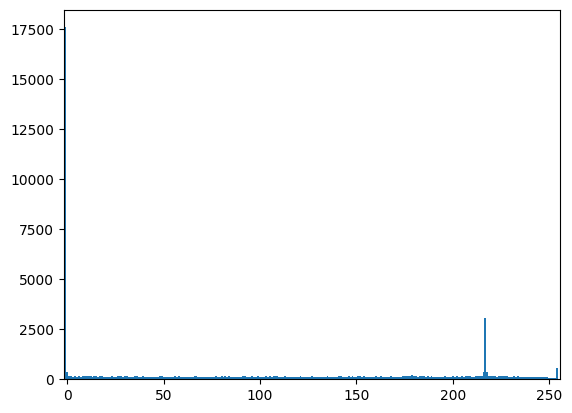

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import cv2

# read image
im = cv2.imread('/content/Encrypted_image_Brain.jpg')
# calculate mean value from RGB channels and flatten to 1D array
vals = im.mean(axis=2).flatten()
# calculate histogram
counts, bins = np.histogram(vals, range(257))
# plot histogram centered on values 0..255
plt.bar(bins[:-1] -1, counts, width=1, edgecolor='none')
plt.xlim([-2, 255.5])
plt.show()
